In [25]:
# Format wyjsciowy
# x = "((X1  * X1 ) + (-1.3674270312890457 - (-3.376987834263713 + ((-2.6380027228879044 + 2.3608469550588884) / (((3.5519318118573686 - (-3.7169987860289178 - ((1.6859504027696284 + ((-0.8494456270060535 * ((3.302262578031147 * -2.7984785588981675) + 4.175988862312552)) * (-4.006180923660173 + -4.1976552793295525))) - ((2.2420987865218542 / (((1.6859504027696284 + 1.2893344522593608) * ((((1.982741040246406 / ((-4.941606323030072 * 4.644741403080701) + (2.5497398430170417 + -4.1976552793295525))) - 4.175988862312552) + (-0.7466024479876836 - (2.7907321434672605 - 2.275505640865971))) + 4.175988862312552)) * 0.7025808046597612)) - (1.9958069516908434 * 0.6145936582147264))))) + (-2.7984785588981675 / 3.5519318118573686)) - 3.882574764537315)))))"
# x = "(X1  * X1 ) + (-1.3674270312890457 - (-3.376987834263713 + ((-2.6380027228879044 + 2.3608469550588884) / (((3.5519318118573686 - (-3.7169987860289178 - ((1.6859504027696284 + ((-0.8494456270060535 * ((3.302262578031147 * -2.7984785588981675) + 4.175988862312552)) * (-4.006180923660173 + -4.1976552793295525))) - ((2.2420987865218542 / (((1.6859504027696284 + 1.2893344522593608) * ((((1.982741040246406 / ((-4.941606323030072 * 4.644741403080701) + (2.5497398430170417 + -4.1976552793295525))) - 4.175988862312552) + (-0.7466024479876836 - (2.7907321434672605 - 2.275505640865971))) + 4.175988862312552)) * 0.7025808046597612)) - (1.9958069516908434 * 0.6145936582147264))))) + (-2.7984785588981675 / 3.5519318118573686)) - 3.882574764537315))))"
# x = "((-1.3674270312890457 - (-3.376987834263713 + ((-2.6380027228879044 + 2.3608469550588884) / (((3.5519318118573686 - (-3.7169987860289178 - ((1.6859504027696284 + ((-0.8494456270060535 * ((3.302262578031147 * -2.7984785588981675) + 4.175988862312552)) * (-4.006180923660173 + -4.1976552793295525))) - ((2.2420987865218542 / (((1.6859504027696284 + 1.2893344522593608) * ((((1.982741040246406 / ((-4.941606323030072 * 4.644741403080701) + (2.5497398430170417 + -4.1976552793295525))) - 4.175988862312552) + (-0.7466024479876836 - (2.7907321434672605 - 2.275505640865971))) + 4.175988862312552)) * 0.7025808046597612)) - (1.9958069516908434 * 0.6145936582147264))))) + (-2.7984785588981675 / 3.5519318118573686)) - 3.882574764537315)))))"

In [26]:
# import numpy as np
# temp = ""
# nawias = 0
# max_nawias = 0
# min_nawias = 0

# for i in x:
#     if i == '(':
#         nawias+=1
#         max_nawias +=1
#     elif i == ')':
#         min_nawias +=1
#         nawias-=1
# print(nawias, max_nawias)
# # tablica = np.zeros(max_nawias)
# tablica = []
# nawias = 0
# max_nawias = 0
# for i in x:
#     # temp = ""
#     if i == " " and len(temp)>0:
#         # print(nawias, temp)
#         # tablica[nawias].append(temp)
#         tablica.append((nawias,temp))
#         temp=""
#         continue
#     elif i == '(':
#         nawias+=1
#         max_nawias+=1
#         continue
#     elif i == ')':
#         if len(temp) >0:
#             tablica.append((nawias,temp))
#             temp=""
#         nawias-=1
#         continue
#     else:
#         temp+=i

In [27]:
# print(tablica)
# print(max_nawias, min_nawias)

In [28]:
# curr_nawias = 0
# new = ""
# new_tablica = []
# for nawias,temp in tablica:
#     if nawias != curr_nawias:
#         curr_nawias = nawias
#         if len(new)>0:
#             # print(nawias, new)
#             if new.count(' ')>=2 and 'X1' not in new and new[0]!=" ":
#                 print(curr_nawias, new, eval(new))
#             new_tablica.append((curr_nawias, new))
#             new = ""
#         new += temp
#     else:
#         new = new + " " + temp 
#     # print(nawias, temp)
# print(new_tablica)

In [29]:
# tablica_bez_X1 = []
# tablica_z_X1 = []
# for i in x:
#     if i == " " and len(temp)>0:
#         # print(nawias, temp)
#         # tablica[nawias].append(temp)
#         tablica.append((nawias,temp))
#         temp=""
#         continue
#     elif i == ')':
#         if len(temp) >0:
#             tablica.append((nawias,temp))
#             temp=""
#         nawias-=1
#         continue
#     else:
#         temp+=i


In [30]:
# def znajdz_wyrazenie_bez_X1(wejscie):
#     poziom = 0
#     wyrazenia_bez_X1 = []
#     wyrazenia_z_X1 = []
#     aktualne_wyrazenie = ""
#     print(wejscie)

#     for znak in wejscie:
#         aktualne_wyrazenie += znak

#         if znak == '(':
#             poziom += 1
#         elif znak == ')':
#             poziom -= 1

#         # print(aktualne_wyrazenie)
#         if poziom == 0:
#             if 'X1' not in aktualne_wyrazenie and len(aktualne_wyrazenie)>1:
#                 wyrazenia_bez_X1.append(aktualne_wyrazenie)
#                 aktualne_wyrazenie = ""
#             else:
#                 # print(aktualne_wyrazenie)
#                 wyrazenia_z_X1.append(aktualne_wyrazenie)
#                 aktualne_wyrazenie = "" 

#     return wyrazenia_bez_X1, wyrazenia_z_X1

# wyrazenia_bez_X1, wyrazenia_z_X1 = znajdz_wyrazenie_bez_X1(x[1:-1])
# print(wyrazenia_z_X1)
# # for i, wyrazenie in enumerate(wyrazenia_bez_X1, 1):
# #     print(f"Wyrażenie {i}: {wyrazenie.strip()}")

In [33]:
# x2 = "((X1  * ((2.486555035105649 - (X1  * (((1.500213115144053 - (4.146752459932621 * X1 )) - -4.S191109584982744) - (3.3461103827822054 + X1 )))) + ((2.3022402121102292 * (0.01047814041090156 * (0.5423142734740773 - ((0.1173300007140412 + (X1  - (X1  * (((-3.6893727461228143 / ((X1  / ((((X1  - 0.09305186767598261) + ((((4.927368356125834 - -4.335553351540385) * (-2.4149382836577358 / -0.6242907182763302)) + ((-0.645999855933546 + -4.064089423330931) - (1.1184195355611903 - 0.8700254349212821))) / (((1.1171354094521613 - ((4.927368356125834 + ((-1.1665935255909532 / (1.9884937787477543 * 3.3461103827822054)) * X1 )) - X1 )) + (-3.4899467889924574 / -1.2208388417812954)) + (((-3.14435160728923 - 2.4284276069131927) - -4.335553351540385) / (4.146752459932621 + -0.5841188131394563))))) - (X1  * (1.3309275363117221 / -0.9390592083263076))) * ((1.0300838660666596 - (((((2.3268931910138413 / -1.1665935255909532) - ((((-4.7236705575018325 - ((-4.13761256577728 / (4.866154092711163 - (-4.335553351540385 / 0.9449052869502061))) / -3.542662797101359)) - (-0.645999855933546 - -1.3981045657710722)) - ((2.2468023891699556 + (((((((-3.673358152274199 - ((0.9449052869502061 + X1 ) * (((-1.3981045657710722 / -3.740696323658521) + -4.00570201320806) * ((-2.3576709372361826 * -1.1665935255909532) + -1.0558979096380652)))) - 1.0300838660666596) * 0.8700254349212821) * (-0.3064165882559333 / -4.636205899001111)) + (2.0522613327122805 - 4.400716205554652)) - 2.4284276069131927) + ((-2.1508135989990818 / 2.0857951004440354) / -4.191109584982744))) + 4.400716205554652)) / -0.9390592083263076)) * (-1.0558979096380652 * (-3.673358152274199 - 0.1173300007140412))) - (((4.648231495641818 - ((((((((4.927368356125834 + 0.8678110801792531) - -3.673358152274199) * X1 ) + (-3.4564762485702705 / (3.259720318419417 - -4.191109584982744))) + X1 ) - 1.9006102475596638) - 1.9006102475596638) + 2.4284276069131927)) * (X1  / -2.0829650582572636)) - -4.636205899001111)) / X1 )) - ((-2.4149382836577358 * -4.6238633191306615) * -0.34708380097202074)))) + ((-0.2594289826745202 * (((1.3309275363117221 * (((((0.8990155931943775 / -3.740696323658521) + -2.9967749836501345) - (-3.118433950963555 / (-4.191109584982744 + 1.1171354094521613))) + (-3.4899467889924574 * X1 )) + -1.1665935255909532)) / -3.2147407593149735) - -2.4149382836577358)) / (0.5039979996274448 / (-3.542662797101359 + -1.575052649803398))))) + (2.3268931910138413 - (-3.542662797101359 * (X1  - ((-0.34708380097202074 + (-0.2594289826745202 / (X1  * ((2.4284276069131927 * ((-1.7850997889961437 + 4.146752459932621) + 1.0806918813337072)) + 2.0857951004440354)))) + 3.3461103827822054))))) / -0.6242907182763302)))) - 0.20232699869928972)))) / 0.9449052869502061))) - (((-3.4810979899920502 + ((1.9939597726867317 * -1.3981045657710722) + (3.306694993413469 * (4.927368356125834 / -1.3981045657710722)))) / -1.1665935255909532) - ((2.19056859835505 + -3.4810979899920502) * 1.4194592970956386)))"

In [32]:
# wyrazenia_bez_X1, wyrazenia_z_X1 = znajdz_wyrazenie_bez_X1(x2[1:-1])
# print(wyrazenia_z_X1)
# print(wyrazenia_bez_X1)
# # for i in wyrazenia_bez_X1:
# #     print(round(eval(wyrazenia_bez_X1[0]),10))

In [103]:
import matplotlib.pyplot as plt
import os

In [106]:
def plotowanie(p, k, funkcja):
    y_axis = []
    x_axis = []
    krok = 0.1
    i = int(p)
    koniec = int(k)
    while i < koniec:
        X1 = i
        if i == 0:  #unikniecie bledu dla "done zad1 fun2 dzi2 0 7.dat"
            X1 = 0.00000001
        y_axis.append(eval(funkcja))
        x_axis.append(i)
        i+=krok
    
    return x_axis, y_axis

def wyznaczenie_przedzialow(nazwa_pliku):
    tabela = nazwa_pliku[:-4].split()
    if tabela[-1] == "pi":
        return -3.14, 3.14
    return tabela[-2], tabela[-1]

def wypisz_funkcje(nazwa_pliku):
    with open(nazwa_pliku, 'r') as plik:
        zawartosc = plik.read()
    if len(zawartosc)>0:
        poczatek, koniec = wyznaczenie_przedzialow(nazwa_pliku)
        # print(poczatek, koniec, zawartosc)
        x, y = plotowanie(poczatek, koniec, zawartosc)
        plt.grid(True)
        plt.plot(x, y)
        nazwa_obrazka = "img" + nazwa_pliku[nazwa_pliku.rfind("\\")+5:-4] + ".png"
        print(nazwa_obrazka)
        # if os.path.exists(nazwa_pliku):
        #     print(f"Plik {nazwa_pliku} już istnieje. Nadpisywanie...")
        #     os.remove(nazwa_pliku)
        plt.savefig(nazwa_obrazka)
        plt.show()

def znajdz_pliki_done(folder, pattern):
    pliki_done = []

    for plik in os.listdir(folder):
        if plik.startswith(pattern) and not plik.endswith("xmxp2.dat"): #!!!!
            pelna_sciezka = os.path.join(folder, plik)
            pliki_done.append(pelna_sciezka)

    return pliki_done

img zad1 fun2 dzi1 -pi pi.png


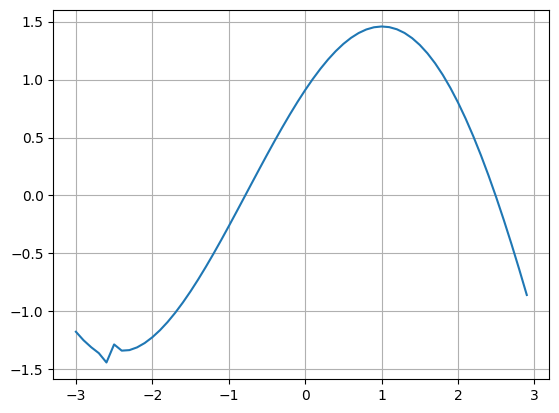

img zad1 fun2 dzi2 0 7.png


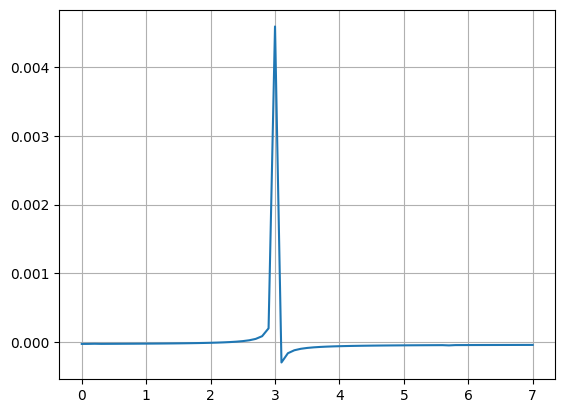

img zad1 fun2 dzi3 0 100.png


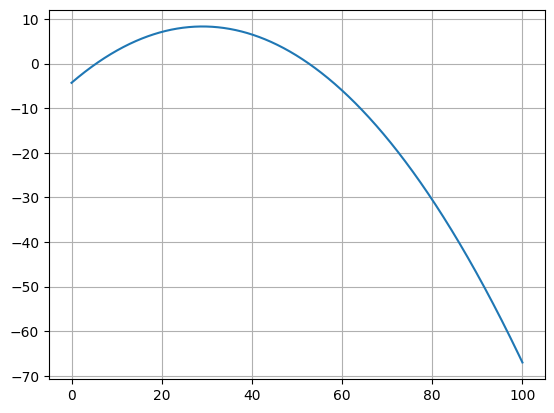

img zad1 fun2 dzi4 -100 100.png


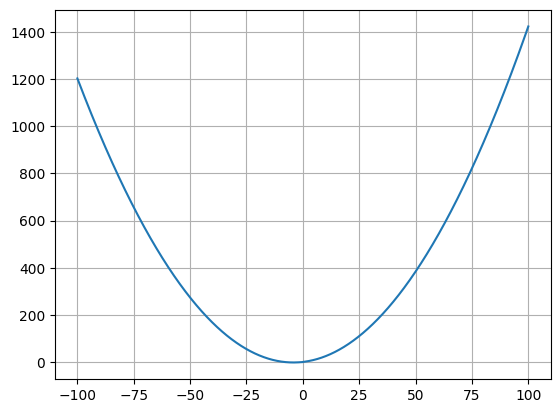

In [109]:
folder_glowny = os.getcwd() #sciezka do twojego folderu
# pliki_done = znajdz_pliki_done(folder_glowny, "done zad1 fun1")
# pliki_done = znajdz_pliki_done(folder_glowny, "done zad1 fun2")
pliki_done = znajdz_pliki_done(folder_glowny, "done zad1 fun3")

for plik in pliki_done:
    wypisz_funkcje(plik)

# TODO: implementacja obrazkow do plikow